
# Cuda application for halfspace, projection and asymmetric projection depth 

Sample usage of halfspace, projection and asymmetric projection depth computation.
It will plot samples and dataset based on depth computation using Graphical processing units.


In [1]:
from depth.model.DepthEucl import DepthEucl 
import numpy as np
from matplotlib import pyplot as plt

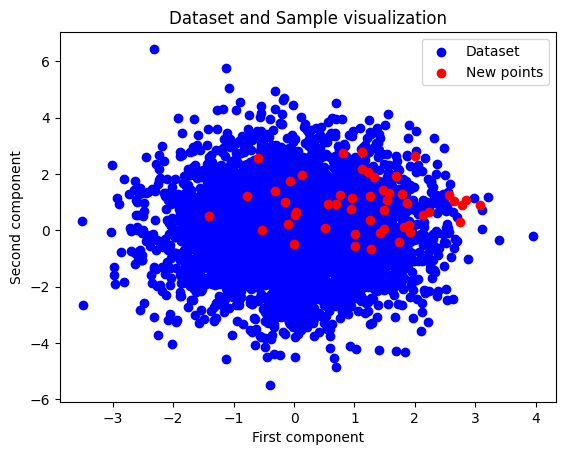

In [2]:
## Creating dataset and samples
np.random.seed(2801)
mat1=[[1, 0],[0, 2]]
mat2=[[1, 0],[0, 1]]
X = np.random.multivariate_normal([1,1], mat2, 50)
dataset = np.random.multivariate_normal([0,0], mat1, 5000)

## visualize points
fig=plt.figure()
plt.scatter(dataset[:,0],dataset[:,1], c="blue",label="Dataset")
plt.scatter(X[:,0],X[:,1], c="red",label="New points")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Dataset and Sample visualization")
plt.legend()
plt.show()

Create model and load dataset for depth computation 



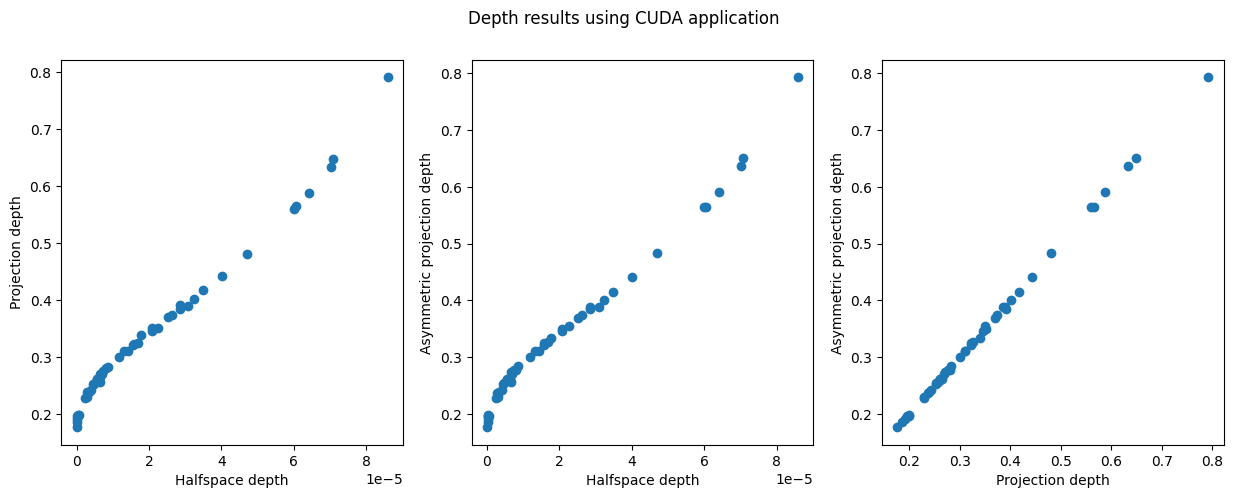

In [3]:
model=DepthEucl().load_dataset(dataset,CUDA=True)
model.halfspace(X,exact=False,solver="refinedrandom",NRandom= 1000,n_refinements=10,CUDA=True) # Compute X Depth w.r.t. the dataset  
model.projection(X,solver="refinedrandom",NRandom= 1000,n_refinements=10,CUDA=True) # Compute X Depth w.r.t. the dataset  
model.aprojection(X,solver="refinedrandom",NRandom= 1000,n_refinements=10,CUDA=True) # Compute X Depth w.r.t. the dataset  
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(model.halfspaceDepth,model.projectionDepth)
plt.xlabel("Halfspace depth")
plt.ylabel("Projection depth")
plt.subplot(1,3,2)
plt.scatter(model.halfspaceDepth,model.aprojectionDepth)
plt.xlabel("Halfspace depth")
plt.ylabel("Asymmetric projection depth")
plt.subplot(1,3,3)
plt.scatter(model.projectionDepth,model.aprojectionDepth)
plt.xlabel("Projection depth")
plt.ylabel("Asymmetric projection depth")
plt.suptitle("Depth results using CUDA application")
plt.show()